# SOLVING ODE WITH WRM

In order to check how to use the weighted residual method, we are taking an Ordinary Differential Equation with analytical solution and apply the weighted residual method. 

$$\frac{dy}{dx} - y = 0, \ \ \  y(0) = 1$$

The domain in which we are seeking the solution is $0 \le x \le 1$. It is easy to check that the anlytical solution for the equation is: 

$$y(x) = e^x$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

The form of the solution in the weighted residual method has the form:

$$T(x,y,z,t)=T_0(x,y,z,t)+\sum_{j=1}^Ja_j(t)\phi_j(x,y,z)$$

$T_0$ is chosen to satisfy the boundary and initial conditions. The approximatin trial functions $\phi_j(x,y,z)$ are known. As a consequence, a suitable solution to the ODE is: 

$$\bar{y}=1+\sum_{j=1}^Na_jx^j$$

The residual is obtained by replacing the function approximation to the differential equation: 

$$R(x)=-1+\sum_{j=1}^Na_j(jx^{j-1} - x^j)$$

Coefficients $a_j$ are found by setting the integral of the weighted residual over the domain equal to 0. 

$$\int_0^1W_m(x)R(x)dx = 0$$

Using the Galerkin method: $W_m(x)=x^{m-1}$ for $m=1, N$. Evaluating the integral for every value of $m$ produces a system of equations $Ax=b$.

Fletcher's book does not develop the system, so here it is for its complete understanding: 

$$\int_0^1W_m(x)\Big[-1+\sum_{j=1}^Na_j(jx^{j-1} - x^j)\Big]dx = 0$$

Distributing the $W_m(x)$ term and transferring the knowns to RHS:

$$\int_0^1\Big[W_m(x)\sum_{j=1}^Na_j(jx^{j-1}-x^j)\Big]dx= \int_0^1W_m(x)dx$$

$$\int_0^1\sum_{j=1}^Na_jW_m(x)(jx^{j-1}-x^j)dx= \int_0^1W_m(x)dx$$

Replacing $W_m(x)$ with the selected weighting function $\phi_m(x)=x^{m-1}$

$$\int_0^1\Big[\sum_{j=1}^Na_jx^{m-1}(jx^{j-1}-x^j)\Big]dx= \int_0^1W_m(x)dx$$

$$\sum_{j=1}^N\int_0^1a_j(jx^{m+j-2}-x^{m+j-1})dx= \int_0^1W_m(x)dx$$

$$\sum_{j=1}^Na_j\int_0^1(jx^{m+j-2}-x^{m+j-1})dx= \int_0^1W_m(x)dx$$

Evaluating the integral within its limits:

$$\sum_{j=1}^N a_j\Big[ \frac{j}{m+j-1}-\frac{1}{m+j}\Big]= \int_0^1W_m(x)dx$$

This result yields the linear system $Ax=b$ mentioned above. Every $m$ is a row of the matrix and every $j$ is a column. The result vector arises from evaluating the integral of the RHS and storing the results in a vector b. 

In [39]:
# Defining weighting function for integrals:
def phi(x, n): return x ** n

# Defining the limts where the function is evaluated
xL = 0
xR = 1

# Setting the approximation order with an arbitrary natural number and declaring
# the vector and the matrix for storing results
order = 10
b = np.empty(order)
A = np.empty((order, order))

# Calculating RHS vector: 
for i in range(0, order): b[i] = integrate.quad(phi, xL, xR, args=(i))[0]

# Filling the matrix with the results of the last markdown box: 
for m in range(0, len(A)):
    M = m + 1
    for j in range(0, len(A)):
        J = j + 1
        A[m, j] = J / (M + J - 1) - 1 / (M + J)

# Printing matrix and vector to check consistency
print('Matrix: \n', A)
print('Vector:\n', b)

# Solving the linear system
coefs = np.linalg.solve(A, b)
print('Coefficients from x^1 to x^m:\n', coefs)

Matrix: 
 [[0.5        0.66666667 0.75       0.8        0.83333333 0.85714286
  0.875      0.88888889 0.9        0.90909091]
 [0.16666667 0.41666667 0.55       0.63333333 0.69047619 0.73214286
  0.76388889 0.78888889 0.80909091 0.82575758]
 [0.08333333 0.3        0.43333333 0.52380952 0.58928571 0.63888889
  0.67777778 0.70909091 0.73484848 0.75641026]
 [0.05       0.23333333 0.35714286 0.44642857 0.51388889 0.56666667
  0.60909091 0.64393939 0.67307692 0.6978022 ]
 [0.03333333 0.19047619 0.30357143 0.38888889 0.45555556 0.50909091
  0.5530303  0.58974359 0.62087912 0.64761905]
 [0.02380952 0.16071429 0.26388889 0.34444444 0.40909091 0.46212121
  0.50641026 0.54395604 0.57619048 0.60416667]
 [0.01785714 0.13888889 0.23333333 0.30909091 0.37121212 0.42307692
  0.46703297 0.5047619  0.5375     0.56617647]
 [0.01388889 0.12222222 0.20909091 0.28030303 0.33974359 0.39010989
  0.43333333 0.47083333 0.50367647 0.53267974]
 [0.01111111 0.10909091 0.18939394 0.25641026 0.31318681 0.36190476
  

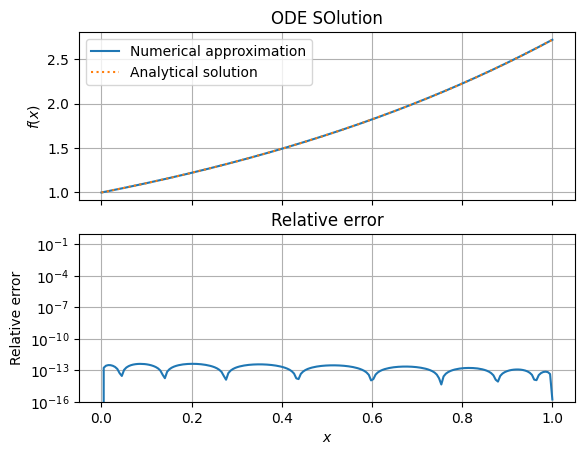

In [41]:
# Plotting the numerical approximation and the analytical solution

# Analytical solution
x = np.linspace(xL, xR, 200)
y_analit = np.exp(x)

# Calculating numerical solution with the given coefficients. Recall that the 
# solution had a 1+ somewhere at the beginning. 
y_num = np.ones_like(x)

for i in range(0, order): y_num += coefs[i] * x ** (i + 1)

# Calculating the relativ error of our approximation
err = np.abs((y_num - y_analit) / y_analit)

fig, ax = plt.subplots(2, 1, sharex = True)

# Plotting both solutions to compare
ax[0].plot(x, y_num, label='Numerical approximation')
ax[0].plot(x, y_analit, ls=':', label='Analytical solution')
ax[0].grid()
ax[0].set_title('ODE SOlution')
ax[0].set_ylabel('$f(x)$')
ax[0].legend()

# Plotting relative error
ax[1].semilogy(x, err)
ax[1].set_ylim((1e-16, 1))
ax[1].set_title('Relative error')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('Relative error')
ax[1].grid()